In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("csvs\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.corr()["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [4]:
df.corr().style.background_gradient(cmap="coolwarm")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


I chose thalach and oldpeak as they have nearly the biggest correlation

In [7]:
X = np.array(df[["thalach", "oldpeak"]])
y = np.array(df["target"])

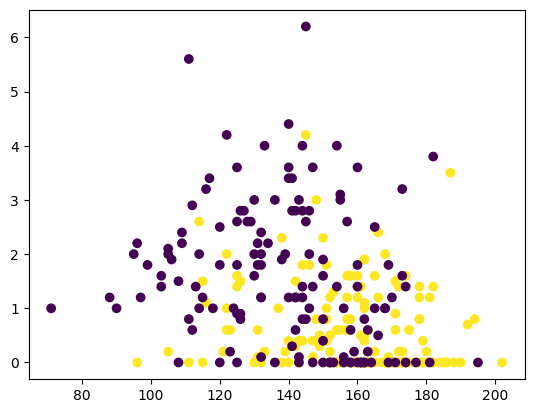

In [8]:
plt.scatter(df.thalach, df.oldpeak, c=y)

Plotting the data

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

pred=model.predict(X_test)
acc=accuracy_score(y_test, pred)

print(f"Accuracy: {acc}")

Accuracy: 0.7631578947368421


In [11]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
#creating  random forest classifiere thats not tuned

RandomForestClassifier()

## Confusion Matrix Display for LR and not tuned DTree 

Logistic Regression: 


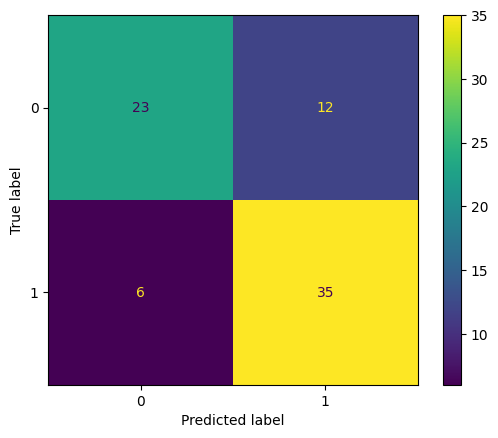

Random Forest: 


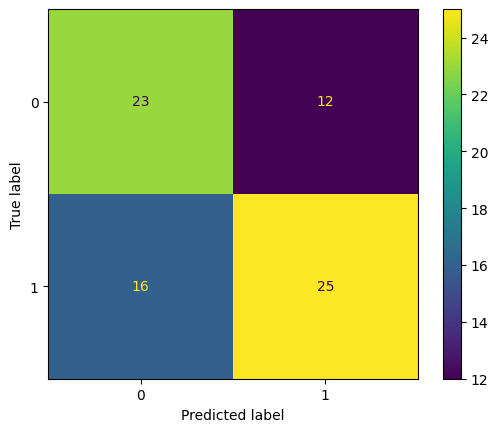

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Logistic Regression: ")
disp1 = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

print("Random Forest: ")
disp1 = ConfusionMatrixDisplay.from_estimator(rforest, X_test, y_test)
plt.show()

## Visualization of Decision Boundaries

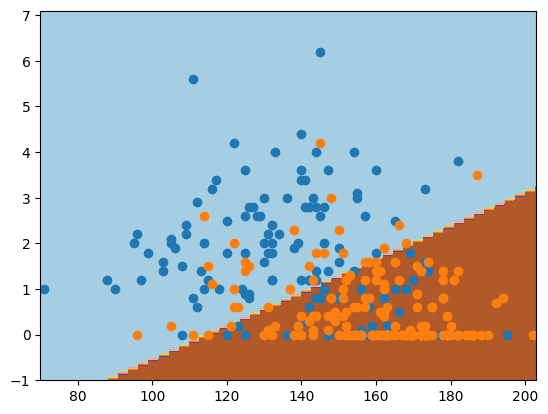

In [10]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

We can see that the calssifying works, as the 2 chosen classes don't overlap too much

## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#sellecting values for all hyperparemeters
params_distribution = {
    "max_depth": [3, 5, 10, 20, 25],  
    "min_samples_split": [5, 10, 15, 20, 25],
    "min_samples_leaf": [5, 10, 15],
    "min_weight_fraction_leaf": [0.05, 0.1, 0.2],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [2, 5, 10, 20, 40],
    "min_impurity_decrease": [0, 0.01, 0.05] #A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

rforest = RandomForestClassifier(random_state=42, n_estimators=20)
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=params_distribution, cv=5)

random_search.fit(X, y)

best_params = random_search.best_params_
print(f"Best parameters are: {best_params}")


Best parameters are: {'min_weight_fraction_leaf': 0.05, 'min_samples_split': 25, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 20}


## Notes
 - **Grid Search** - algorithm searches thru every posible combination of parametres
 - **Random Search** - does not earch thru every possibility, but chooses and random, being faster, and better for large number of hyperparameters
 - **Hyperparameters**
    - *max_depth* - depth of the decision tree 
    - *min_samples_split* - minimum number of samples needed to split a leaf 
    - *min_samples_leaf* - the minimum samples a leaf node must have after a split
    - *min_weight_fraction_leaf* - the minimum fraction of the total weight required in a leaf node.
    - *max_features* - number of features to conssider (either a number or a proportion of features (sqrt or log2))
    - *max_leaf_nodes* - limits number of leaf nodes
    - *min_impurity_decrease* - A node will only be split if the decrease in impurity resulting from the split is at least this value.

## Plotting Accuracies for Different Hyperparameters

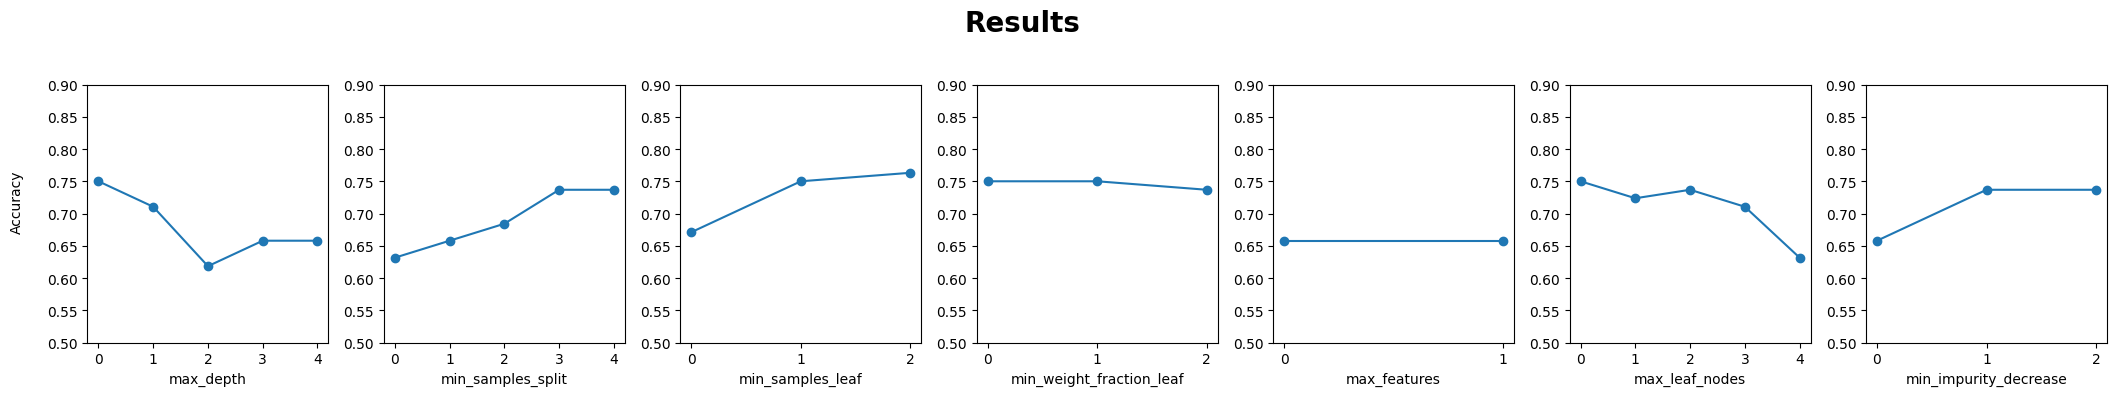

In [16]:
fig, axes = plt.subplots(1, 7, figsize = (22, 4)) #creating subplots
plt.suptitle("Results", fontweight = "bold", fontsize = 20)

"""
Looping thru param keys, selecting the arguments 
for the classifier, fitting, getting accuracies,
than plotting
"""

for key, ax in zip(params_distribution.keys(), axes):   
    accuracies = []
    values = list(params_distribution[key])
    for value in values:
        args = {key: value, "random_state": 42}
        random_forest = RandomForestClassifier(**args)

        random_forest.fit(X_train, y_train)
        pred = random_forest.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracies.append(acc)

    ax.plot(accuracies, marker="o")

     # Set y-axis limits
    ax.set_ylim(0.5, 0.9)

    # Add x-labels for each subplot
    ax.set_xticks(range(len(values)))
    ax.set_xlabel(key)  # x-label for each subplot
    
fig.text(0.04, 0.5, "Accuracy", va="center", rotation="vertical")

plt.tight_layout(rect=[0.05, 0, 1, 0.95])  # Adjust layout to make space for the y-axis label


#FOR TRAINING DATA#

We can see that the accuracy varries more in relation to the hyperparameters we use than for decision trees, thus showing how important hyperparameter tuning is. Some parameters are more imoprtant than others, like max_depth, max_leaf_nodes and min_impurity_decrease, who change the accuracy of the model a lot, in constrast to min_weight_fraction_leaf, who doesn't change the accurasy at all in this case
In comparison to decision trees, the accuracy varies a lot more, with bigger changes

## Best Forest

In [17]:
best_random_forest = RandomForestClassifier(**random_search.best_params_)

best_random_forest.fit(X_train, y_train)
best_pred = best_random_forest.predict(X_test)

best_acc = accuracy_score(y_test, best_pred)
print(f"Accuracy: {best_acc}")

Accuracy: 0.7368421052631579


## Confusoin matrix of Best Random Forest

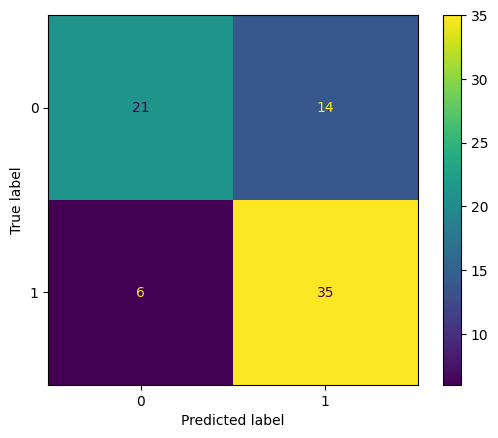

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_random_forest, X_test, y_test)

## Conclusion
In conclusion the accuracy is comparable to the one for the decision tree algorithm, altho I don't know why it's slightly lower. I speculate that it's because there is not that much data to train on, and random forrest excel at handling a large amount of data and features.

![forrest](csvs/forrest.jpg) 